In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import backward
from coolmom import SGD

import numpy as np
import pickle
import os
from sklearn.utils import shuffle
from tqdm import tqdm
import ipdb

import Utils.util as util

np.random.seed(0)
torch.manual_seed(999)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(999)
    torch.cuda.empty_cache()

In [2]:
# CRASH_fname = 'CRASH_FE_filtered_subsampled_fmriADJ.pkl'

# with open(CRASH_fname, 'rb') as handle:
#     F_t, adj_mx, adj_mx_idx, _input, _gt, coeffs, \
#     inv_mapping, region_assignment, nTrain, nValid, \
#     nTest, scaler_in, scaler_out = pickle.load(handle)
    
CRASH_fname = 'CRASH_Fonly.pkl'
with open(CRASH_fname, 'rb') as handle:
    F_t, adj_mx, adj_mx_idx, _input, _gt, nTrain, \
    nValid, nTest, scaler_in, scaler_out = pickle.load(handle)


##  Testing spatial conv-deconv: only using one time frame's value on all nodes

(11712, 200) (11712, 200) (11712,) 192 (200, 200)


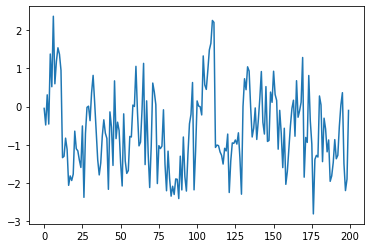

In [18]:
device = 'cuda:0'
# prep data
# _input.shape: (11712, 10, 200)
x = _input[:,5,:]#[:,None,:]
y = x
print(x.shape, y.shape, adj_mx_idx.shape, len(adj_mx), adj_mx[0][0].shape)

plt.plot(x[0])

x = torch.tensor(x).to(device)
# y = x
y = torch.tensor(y).to(device)